In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
import tensorflow as tf
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
tf.random.set_seed(42)


In [2]:
df = pd.read_csv("Preprocessed/alldata_17.csv")
df.head()

,AU01_r,AU02_r,AU04_r,AU05_r,AU06_r,AU07_r,AU09_r,AU10_r,AU12_r,AU14_r,AU15_r,AU17_r,AU20_r,AU23_r,AU25_r,AU26_r,AU45_r,label
0,0.0196,0.0404,0.0352,0.0532,0.0112,0.0388,0.0000,0.0296,0.0040,0.0,0.0124,0.0252,0.0212,0.0268,0.0540,0.0648,0.0336,I need to take a break
1,0.0152,0.0312,0.0320,0.0500,0.0116,0.0340,0.0084,0.0292,0.0000,0.0,0.0000,0.0260,0.0260,0.0352,0.0392,0.0816,0.0288,I need to take a break
2,0.0148,0.0344,0.0208,0.0504,0.0112,0.0396,0.0044,0.0372,0.0064,0.0,0.0000,0.0364,0.0220,0.0568,0.0160,0.0624,0.0372,I need to take a break
3,0.0204,0.0380,0.0208,0.0296,0.0076,0.0392,0.0048,0.0256,0.0044,0.0,0.0000,0.0260,0.0368,0.0504,0.0100,0.0416,0.0348,I need to take a break
4,0.0184,0.0308,0.0256,0.0252,0.0092,0.0368,0.0000,0.0212,0.0076,0.0,0.0072,0.0208,0.0328,0.0352,0.0168,0.0464,0.0268,I need to take a break


In [3]:
encoder = OneHotEncoder(sparse_output=False)
one_hot_labels = encoder.fit_transform(df[['label']])
one_hot_df = pd.DataFrame(one_hot_labels, columns=encoder.get_feature_names_out(['label']))

df = pd.concat([df, one_hot_df], axis=1)
# df = df.drop('label', axis=1)
df = df.sample(frac=1)
df.head()

,AU01_r,AU02_r,AU04_r,AU05_r,AU06_r,AU07_r,AU09_r,AU10_r,AU12_r,AU14_r,...,AU23_r,AU25_r,AU26_r,AU45_r,label,label_I don't need anything right now,label_I need an easier quesiton,label_I need feedback on my progress,label_I need reminders to stay focused,label_I need to take a break
1401,0.0580,0.0380,0.0056,0.0104,0.0000,0.0000,0.0020,0.0000,0.0000,0.0276,...,0.0248,0.0040,0.0052,0.0228,I need an easier quesiton,0.0,1.0,0.0,0.0,0.0
3643,0.0512,0.0440,0.0332,0.0572,0.0028,0.0576,0.0328,0.1160,0.0604,0.0000,...,0.0596,0.0488,0.0676,0.0372,I don't need anything right now,1.0,0.0,0.0,0.0,0.0
3227,0.0272,0.0548,0.0076,0.0216,0.0124,0.0168,0.0076,0.0680,0.0548,0.0392,...,0.0600,0.0244,0.0188,0.0400,I don't need anything right now,1.0,0.0,0.0,0.0,0.0
7005,0.0020,0.0052,0.0332,0.0172,0.0244,0.0484,0.0272,0.0172,0.0216,0.0312,...,0.0308,0.0188,0.0204,0.0000,I need to take a break,0.0,0.0,0.0,0.0,1.0
5351,0.0372,0.0468,0.0348,0.0268,0.0120,0.0232,0.0424,0.0240,0.0148,0.0000,...,0.0144,0.0536,0.0896,0.0320,I need feedback on my progress,0.0,0.0,1.0,0.0,0.0


In [4]:
x = df.iloc[:, :17]
y = df.iloc[:, 18:]

In [5]:
print(y)

      label_I don't need anything right now  label_I need an easier quesiton  \
1401                                    0.0                              1.0   
3643                                    1.0                              0.0   
3227                                    1.0                              0.0   
7005                                    0.0                              0.0   
5351                                    0.0                              0.0   
...                                     ...                              ...   
231                                     0.0                              0.0   
2811                                    0.0                              0.0   
2293                                    1.0                              0.0   
6938                                    0.0                              0.0   
1324                                    0.0                              1.0   

      label_I need feedback on my progr

In [6]:
x_train, x_temp, y_train, y_temp = train_test_split(x, y, test_size=0.2, stratify=df['label'], shuffle=True)
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.5, shuffle=True) 

print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

print(y_train.shape)
print(y_val.shape)
print(y_test.shape)

(5856, 17)
(732, 17)
(732, 17)
(5856, 5)
(732, 5)
(732, 5)


In [7]:
model = Sequential([
    Dense(24, activation='relu', input_dim = (17)),
    Dense(24, activation='relu'),
    Dense(12, activation='relu'),
    Dense(y.shape[1], activation='softmax')
]) 
# loss = 0.7650273442268372, epochs 1000

model.compile(
    optimizer = 'adamw',
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
)

model.summary()

/Users/neptune/anaconda3/envs/AI2023/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 24)             │           432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 24)             │           600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 12)             │           300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 5)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,397 (5.46 KB)

 Trainable params: 1,397 (5.46 KB)

 Non-trainable params: 0 (0.00 B)

In [8]:

themodel = model.fit(x_train, y_train, epochs=1000, batch_size=256, validation_data = (x_val, y_val))


loss, accuracy = model.evaluate(x_test, y_test)

print(accuracy)

Epoch 1/1000
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.2013 - loss: 1.6026 - val_accuracy: 0.3402 - val_loss: 1.5767
Epoch 2/1000
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3523 - loss: 1.5688 - val_accuracy: 0.3880 - val_loss: 1.5375
Epoch 3/1000
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3889 - loss: 1.5306 - val_accuracy: 0.3538 - val_loss: 1.4994
Epoch 4/1000
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3670 - loss: 1.4924 - val_accuracy: 0.3538 - val_loss: 1.4676
Epoch 5/1000
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3671 - loss: 1.4559 - val_accuracy: 0.3675 - val_loss: 1.4187
Epoch 6/1000
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3952 - loss: 1.4018 - val_accuracy: 0.3907 - val_loss: 1.3539
Epoch 7/1000
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4062 - loss: 1.3365 - val_accuracy: 0.3880 - val_loss: 1.2901
Epoch 8/1000
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4065 - loss: 1.2766 - val_accuracy: 0.

In [9]:
model.save('studentneeds.h5')

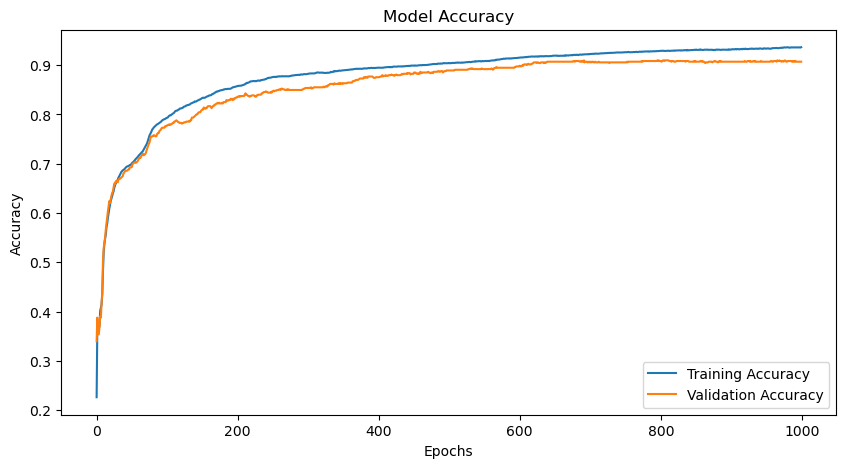

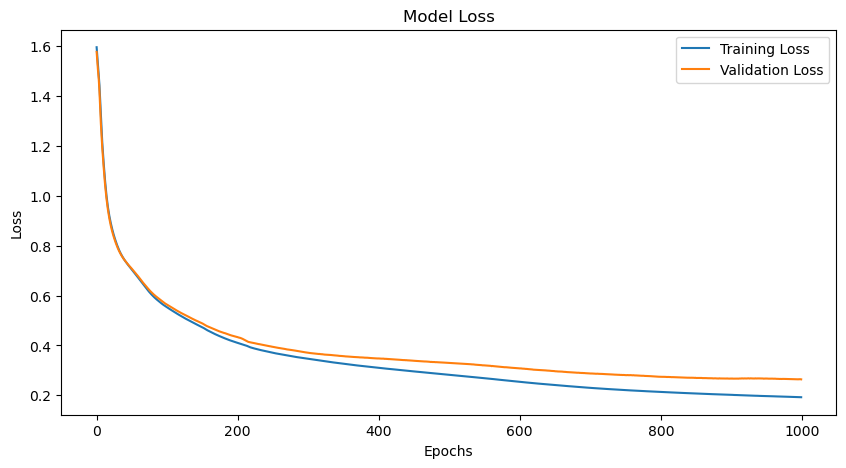

In [10]:
import matplotlib.pyplot as plt

# Extract accuracy and loss from the history
train_accuracy = themodel.history['accuracy']
val_accuracy = themodel.history['val_accuracy']
train_loss = themodel.history['loss']
val_loss = themodel.history['val_loss']

# Plot Accuracy
plt.figure(figsize=(10, 5))
plt.plot(train_accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot Loss
plt.figure(figsize=(10, 5))
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Mean F1-Score (Macro Average): 0.9127680513118289


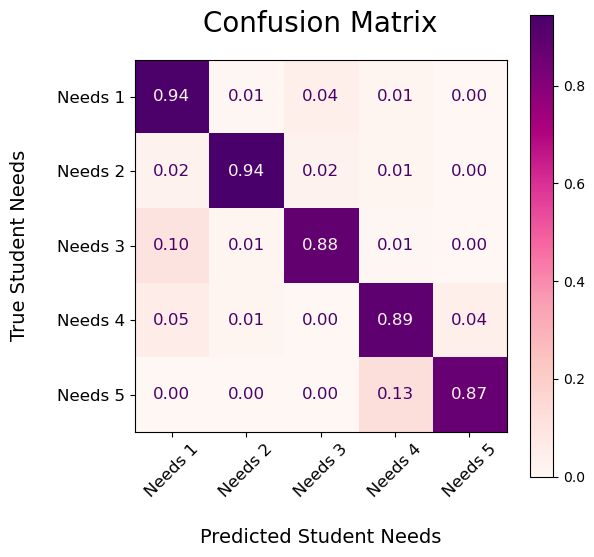

In [11]:
import numpy as np
from sklearn.metrics import f1_score, classification_report

# model = load_model("studentneeds.h5")

y_pred_prob = model.predict(x_test)
y_pred = np.argmax(y_pred_prob, axis=1)
y_true = np.argmax(y_test.values, axis=1)

mean_f1 = f1_score(y_true, y_pred, average='weighted')
print(f"Mean F1-Score (Macro Average): {mean_f1}")



# Create and normalize confusion matrix
cm = confusion_matrix(y_true, y_pred, normalize='all')
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Define class labels and new labels for display
class_labels = y_test.columns
new_labels = ["Needs 1", "Needs 2", "Needs 3", "Needs 4", "Needs 5"]

# Plot Confusion Matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)
fig, ax = plt.subplots(figsize=(6, 6))  # Adjust figure size if needed
disp.plot(ax=ax, cmap='RdPu', xticks_rotation=45, values_format='.2f')

# Customize font size for matrix text
for text in disp.text_.ravel():
    text.set_fontsize(12)

# Update axis labels and title
ax.set_xticks(np.arange(len(new_labels)))
ax.set_xticklabels(new_labels, ha='center', fontsize=12)
ax.set_yticks(np.arange(len(new_labels)))
ax.set_yticklabels(new_labels, fontsize=12)

ax.set_xlabel("Predicted Student Needs", labelpad=20, loc='center', fontsize=14)
ax.set_ylabel("True Student Needs", labelpad=20, fontsize=14)
ax.set_title("Confusion Matrix", fontsize=20, pad=20)  # Adjust padding for better spacing

plt.show()


In [12]:
report = classification_report(y_true, y_pred, output_dict=True)

print(report)

{'0': {'precision': 0.9228070175438596, 'recall': 0.9359430604982206, 'f1-score': 0.9293286219081272, 'support': 281}, '1': {'precision': 0.96, 'recall': 0.9448818897637795, 'f1-score': 0.9523809523809523, 'support': 127}, '2': {'precision': 0.8913043478260869, 'recall': 0.8785714285714286, 'f1-score': 0.8848920863309352, 'support': 140}, '3': {'precision': 0.826530612244898, 'recall': 0.8901098901098901, 'f1-score': 0.8571428571428572, 'support': 91}, '4': {'precision': 0.9418604651162791, 'recall': 0.8709677419354839, 'f1-score': 0.9050279329608939, 'support': 93}, 'accuracy': 0.912568306010929, 'macro avg': {'precision': 0.9085004885462247, 'recall': 0.9040948021757605, 'f1-score': 0.9057544901447532, 'support': 732}, 'weighted avg': {'precision': 0.9136867344201863, 'recall': 0.912568306010929, 'f1-score': 0.9127680513118289, 'support': 732}}


<h1>Cross-validation</h1>

In [13]:
from sklearn.model_selection import KFold
from sklearn.metrics import f1_score

def create_model(input_dim, output_dim):
    model = Sequential([
        Dense(24, activation='relu', input_dim = (17)),
        Dense(24, activation='relu'),
        Dense(12, activation='relu'),
        Dense(y.shape[1], activation='softmax')
    ]) 
    model.compile(
        optimizer = 'adamw',
        loss = 'categorical_crossentropy',
        metrics = ['accuracy']
    )
    return model

In [14]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Initialize metrics storage
f1_scores = []
accuracy_scores = []
precision_scores = []
recall_scores = []

kf = KFold(n_splits=5, shuffle=True, random_state=42)

for fold, (train_idx, val_idx) in enumerate(kf.split(x)):
    print(f"Fold {fold + 1}")
    x_train, x_val = x.iloc[train_idx], x.iloc[val_idx]
    y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]
    
    y_val_indices = np.argmax(y_val.values, axis=1)  # Convert one-hot labels to indices
    
    # Train the model
    model = create_model(input_dim=17, output_dim=5)  # Adjust dimensions as needed
    model.fit(x_train, y_train, epochs=1000, batch_size=256, verbose=0)
    
    # Predict on the validation set
    y_val_pred_prob = model.predict(x_val)
    y_val_pred = np.argmax(y_val_pred_prob, axis=1)
    
    # Calculate metrics for the fold
    accuracy = accuracy_score(y_val_indices, y_val_pred)
    precision = precision_score(y_val_indices, y_val_pred, average='weighted')
    recall = recall_score(y_val_indices, y_val_pred, average='weighted')
    f1 = f1_score(y_val_indices, y_val_pred, average='weighted')
    
    # Store the metrics
    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)
    
    print(f"Fold {fold + 1}:")
    print(f"  Accuracy:  {accuracy:.4f}")
    print(f"  Precision: {precision:.4f}")
    print(f"  Recall:    {recall:.4f}")
    print(f"  F1 Score:  {f1:.4f}")

# Print overall averages
print("\nAverage Metrics Across Folds:")
print(f"  Accuracy:  {np.mean(accuracy_scores):.4f}")
print(f"  Precision: {np.mean(precision_scores):.4f}")
print(f"  Recall:    {np.mean(recall_scores):.4f}")
print(f"  F1 Score:  {np.mean(f1_scores):.4f}")


Fold 1


/Users/neptune/anaconda3/envs/AI2023/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 831us/step
Fold 1:
  Accuracy:  0.8962
  Precision: 0.8976
  Recall:    0.8962
  F1 Score:  0.8959
Fold 2


/Users/neptune/anaconda3/envs/AI2023/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 859us/step
Fold 2:
  Accuracy:  0.9344
  Precision: 0.9347
  Recall:    0.9344
  F1 Score:  0.9344
Fold 3


/Users/neptune/anaconda3/envs/AI2023/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Fold 3:
  Accuracy:  0.9071
  Precision: 0.9095
  Recall:    0.9071
  F1 Score:  0.9072
Fold 4


/Users/neptune/anaconda3/envs/AI2023/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Fold 4:
  Accuracy:  0.9133
  Precision: 0.9137
  Recall:    0.9133
  F1 Score:  0.9130
Fold 5


/Users/neptune/anaconda3/envs/AI2023/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Fold 5:
  Accuracy:  0.9064
  Precision: 0.9065
  Recall:    0.9064
  F1 Score:  0.9064

Average Metrics Across Folds:
  Accuracy:  0.9115
  Precision: 0.9124
  Recall:    0.9115
  F1 Score:  0.9114
